#  Smoothing covid test data for Devon

In a seperate notebook https://github.com/Urban-Analytics/RAMP-UA/blob/Mollys_DA/experiments/calibration/observation_data/CreatingObservations.ipynb using Python:  
* Covid test data for Devon is downloaded and processed into the correct format
* Data is then shifted in time and multipliers applied to attempt to correct positive case results into a truer estimate of Covid infections

There is considerable noise (/outliers) in the recorded case data. To remove this, and to make patterns in the data more clear, the data can be smoothed using an algorithm. In this case, smoothing is achieved by fitting a generalised additive model (GAM) to the data. This is most easily implemented in R. 

Therefore, the corrected daily case data from the Python notebook is saved to a csv file and smoothing is then carried out in this R notebook. The smoothed data is saved to a csv file to then be re-uploaded into the Python notebook.

In [1]:
# Download required library
library(mgcv)
library(tibble)

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'tibble' was built under R version 4.0.5"


In [3]:
# Create an empty matrix to store the results for each MSOA in Devon
devon_gam_cases <- data.frame(matrix(NA, nrow = 405, ncol = 0))

### Smoothing each MSOA seperately

#### Read in daily cases data for  each individual MSOA, created in the Python notebook

In [3]:
# devon_cases_msoa <- read.csv("weekly_cases_devon_corrected")

# # Convert format of date column (think this is needed for gam function to work)
# devon_cases_msoa$numericdate <-as.numeric(as.Date(devon_cases_msoa$Date, format =  "%Y-%m-%d"))

#### Smooth data

In [4]:
# # Create a dataframe with the dates, to add data too
# devon_gam_cases_msoa <- data.frame('Date'=devon_cases_msoa$Date)

# # MSOA codes - removing date and numeric date
# msoa_codes = colnames(devon_cases_msoa)[-1]
# msoa_codes = msoa_codes[-length(msoa_codes)]

# # For each MSOA, create a dataframe containing the cases on each day for that MSOA
# for (msoa_code in msoa_codes){
#     # select just one MSOA
#     one_msoa <- devon_cases_msoa[c("numericdate", msoa_code)]
#     # rename column from MSOA name to cases
#     colnames(one_msoa)[2] <- "PosCases"
#     # Fit 
#     gam_Devon <- mgcv::gam(PosCases ~ s(numericdate, bs = "cr"), data = one_msoa, family = nb())
#     # Plot
#     #plot(one_msoa$PosCases,  ylab="Cases", xlab = "Date")
#     #points(round(fitted.values(gam_Devon)), col = "red")
#     #abline(v = 38, lty = "dashed")
#     #gam_cases <- round(fitted.values(gam_Devon))
   
#     ## Join to dataframe
#     devon_gam_cases_msoa$msoa_code <- gam_cases
#     # set the actual msoa_code as the column name
#     colnames(devon_gam_cases_msoa)[ncol(devon_gam_cases_msoa)] <- msoa_code   }

#### Save to csv

In [123]:
# # Save to csv
# write.csv(devon_gam_cases_msoa, "gam_daily_cases_devon_msoas_corrected.csv", row.names = FALSE)

### Smoothing data for whole of Devon
#### Read in daily cases data for  whole of Devon combined, created in the Python notebook

In [39]:
# Read in case data for all MSOAs in Devon
weekly_cases_devon_corrected <- read.csv("weekly_cases_devon_corrected.csv")
# devon_cases[5:20]

# Convert format of date column (think this is needed for gam function to work)
weekly_cases_devon_corrected$numericdate <-as.numeric(as.Date(daily_cases_devon_corrected$Date, format =  "%Y-%m-%d"))


#### Smooth data

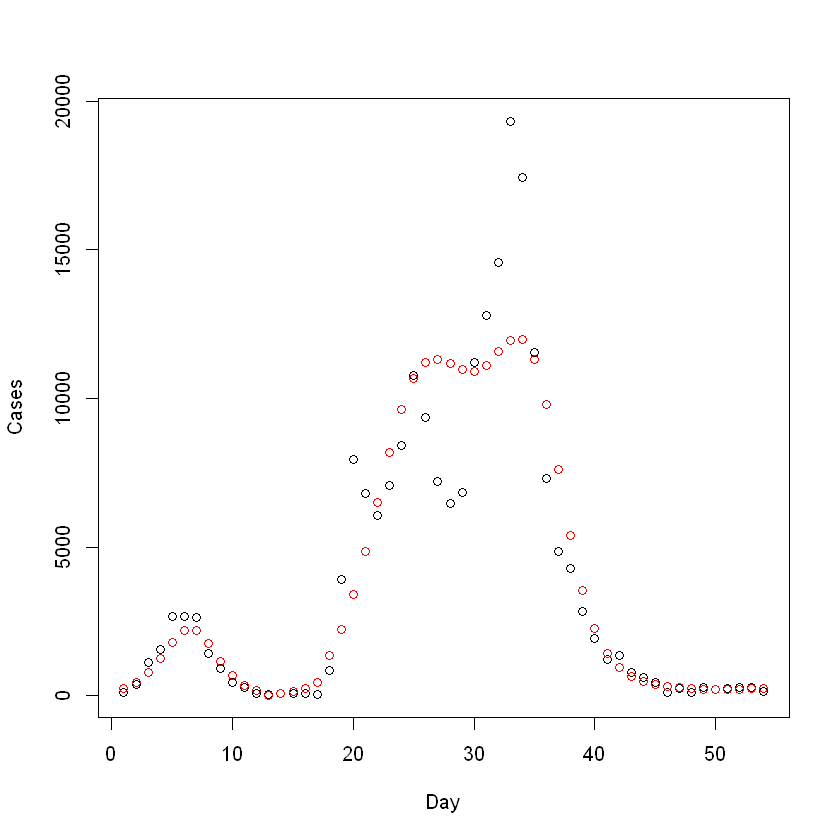

In [82]:
# Fit 
gam_weekly_cases_devon_corrected <- mgcv::gam(ShiftedInfections ~ s(numericdate, bs = "cr"), 
                                              data = weekly_cases_devon_corrected, gamma =0.0001, family = nb())

# Plot
plot(weekly_cases_devon_corrected$ShiftedInfections,  ylab="Cases", xlab = "Day")
points(round(fitted.values(gam_weekly_cases_devon_corrected)), col = "red")
# abline creating error and don't even know what it's for
# abline(v = 38, lty = "dashfed")

In [72]:
# Fit 
gam_weekly_cases_devon_corrected <- mgcv::gam(ShiftedInfections ~ s(numericdate, bs = "cr"), data = weekly_cases_devon_corrected, family = zip())

# Plot
plot(weekly_cases_devon_corrected$ShiftedInfections,  ylab="Cases", xlab = "Day")
points(round(fitted.values(gam_weekly_cases_devon_corrected)), col = "red")
# abline creating error and don't even know what it's for
# abline(v = 38, lty = "dashfed")

ERROR: Error in zip(): argument "files" is missing, with no default


#### Add smoothed data to dataframe, and save as csv

In [38]:
gam_cases <- round(fitted.values(gam_weekly_cases_devon_corrected))
# ## Join back to Devon daily data
weekly_cases_devon_corrected$SmoothedShiftedInfections <- gam_cases
# Remove numeric date columns
weekly_cases_devon_corrected = subset(weekly_cases_devon_corrected, select = -c(numericdate) )
# Save to csv
write.csv(weekly_cases_devon_corrected, "gam_weekly_cases_devon_corrected.csv", row.names = FALSE)

#### Cumulative cases

In [14]:
# # Read in case data for all MSOAs in Devon
# cumulative_devon_cases <- read.csv("daily_cumcases_devon_corrected.csv")
# head(cumulative_devon_cases)

In [54]:
# # Convert format of date column
# cumulative_devon_cases$numericdate <-as.numeric(as.Date(cumulative_devon_cases$Date, format =  "%Y-%m-%d"))

# # Fit 
# gam_Devon <- mgcv::gam(ShiftedInfections ~ s(numericdate, bs = "cr"), data = cumulative_devon_cases, family = nb())
# # Plot
# plot(cumulative_devon_cases$ShiftedInfections,  ylab="Cases", xlab = "Day")
# points(round(fitted.values(gam_Devon)), col = "red")
# abline(v = 38, lty = "dashed")
# gam_cases <- round(fitted.values(gam_Devon))

# # ## Join back to one_msoa
# # one_msoa$gam_cases <- gam_cases
# # #
# # devon_gam_cases_msoa$col <-gam_cases

# # # rename
# # colnames(devon_gam_cases_msoa)[iter_i] <- col